<a href="https://colab.research.google.com/github/akshithaa1/project_DL/blob/main/image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 106ms/step - loss: 1.5891 - accuracy: 0.5756 - val_loss: 0.6666 - val_accuracy: 0.6396
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5938 - accuracy: 0.6879 - val_loss: 0.5182 - val_accuracy: 0.7524
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5116 - accuracy: 0.7502 - val_loss: 0.4775 - val_accuracy: 0.7624
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4346 - accuracy: 0.7990 - val_loss: 0.4639 - val_accuracy: 0.7880
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3963 - accuracy: 0.8206 - val_loss: 0.6311 - val_accuracy: 0.7268
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3262 - accuracy: 0.8544 - val_loss: 0.5320 - val_accuracy: 0.7972
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2588 - accuracy: 0.8891 - val_loss: 0.4539 - val_ac

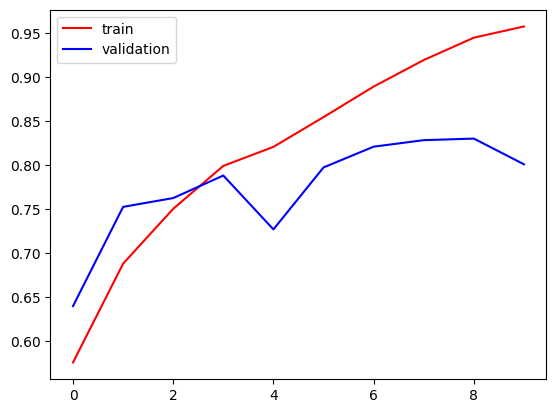

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

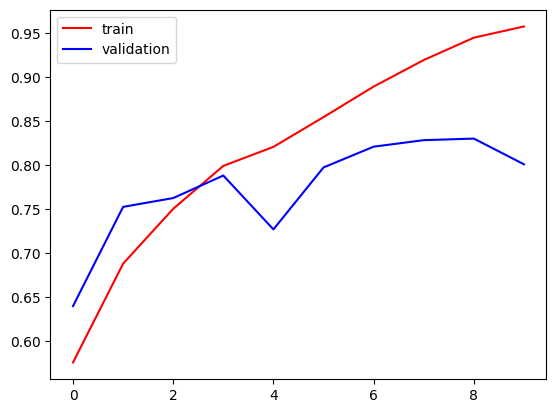

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

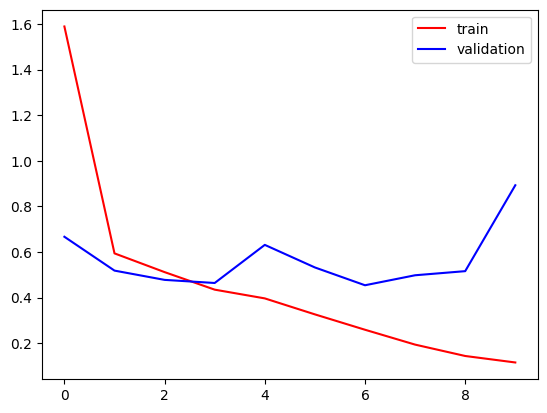

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

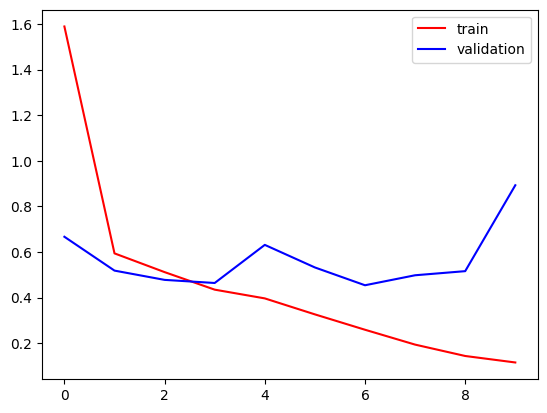

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/test/cats/cat.10001.jpg')

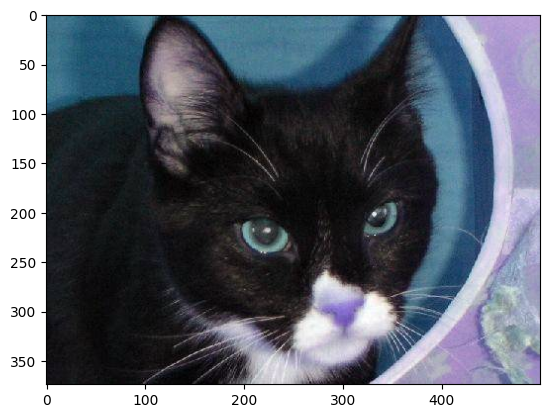

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(374, 500, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [ ]:
if model.predict(test_input==1):
  print('cat')
else:
  print('dog')

1/1 [==============================] - 0s 18ms/step
cat


1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)

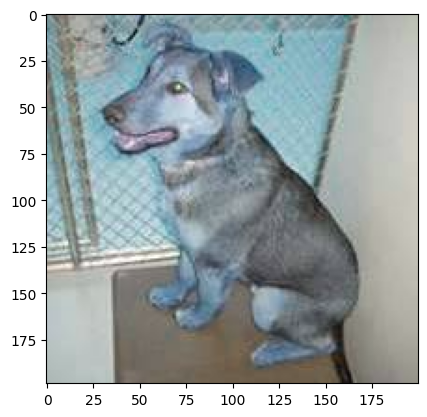

In [ ]:
test_img = cv2.imread('/content/test/dogs/dog.1002.jpg')
plt.imshow(test_img)
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

In [ ]:
train_img = cv2.imread('/content/train/dogs/dog.10001.jpg')

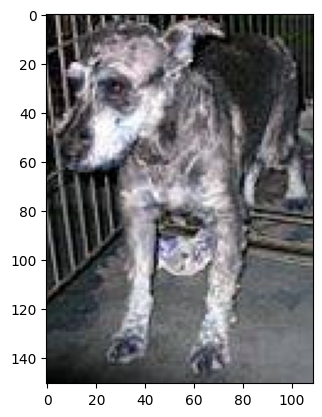

In [ ]:
plt.imshow(train_img)

In [ ]:
train_img.shape

(151, 109, 3)

In [ ]:
train_img = cv2.resize(train_img,(256,256))

In [ ]:
train_input = train_img.reshape((1,256,256,3))

In [ ]:
model.predict(train_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
if model.predict(train_input==1):
  print('dog')
else:
  print('cat')

1/1 [==============================] - 0s 22ms/step
dog
